In [40]:
import os, datetime
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorboard.compat.tensorflow_stub.dtypes import float32
from tensorflow import keras, int32
from tensorflow.keras import layers
from tensorflow.python.keras.engine.base_layer_utils import training_arg_passed_to_call


In [41]:
data = pd.read_csv('datasets/life_expectancy.csv')
data.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1772,Mozambique,2007,Developing,52.1,425.0,74,1.03,53.950279,75.0,267,...,75.0,5.25,75.0,14.1,422.146157,22188387.0,3.8,3.7,0.360,8.2
324,Bosnia and Herzegovina,2011,Developing,76.9,92.0,0,4.64,7.959131,88.0,10,...,89.0,9.71,88.0,0.1,55.156834,3688865.0,2.6,2.5,0.711,13.4
2439,Spain,2001,Developed,79.4,84.0,2,9.86,2044.169761,83.0,0,...,95.0,7.24,96.0,0.1,15323.611400,485412.0,0.6,0.5,0.825,15.7
846,Equatorial Guinea,2003,Developing,53.8,334.0,3,7.13,309.783459,NaN,18,...,46.0,2.23,37.0,3.6,3577.176197,694611.0,1.2,1.1,0.554,8.4
2805,United States of America,2004,Developed,77.5,111.0,28,8.48,0.000000,92.0,37,...,92.0,15.14,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN


In [42]:
data.shape

(2938, 22)

In [43]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [44]:
countries = data['Country'].unique()

na_cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
           ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
           ' thinness  1-19 years', ' thinness 5-9 years', 'Population',
           'Income composition of resources', 'Schooling']

for col in na_cols:
    for country in countries:
        data.loc[data['Country']==country, col] = (data.loc[data['Country']==country, col].fillna(data[data['Country']==country][col].mean()))

In [45]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [46]:
data = data.dropna()
data.shape

(2128, 22)

In [47]:
data['Status'].value_counts()

Status
Developing    1824
Developed      304
Name: count, dtype: int64

In [48]:
data['Country'].value_counts()

Country
Afghanistan    16
Albania        16
Algeria        16
Angola         16
Argentina      16
               ..
Uruguay        16
Uzbekistan     16
Vanuatu        16
Zambia         16
Zimbabwe       16
Name: count, Length: 133, dtype: int64

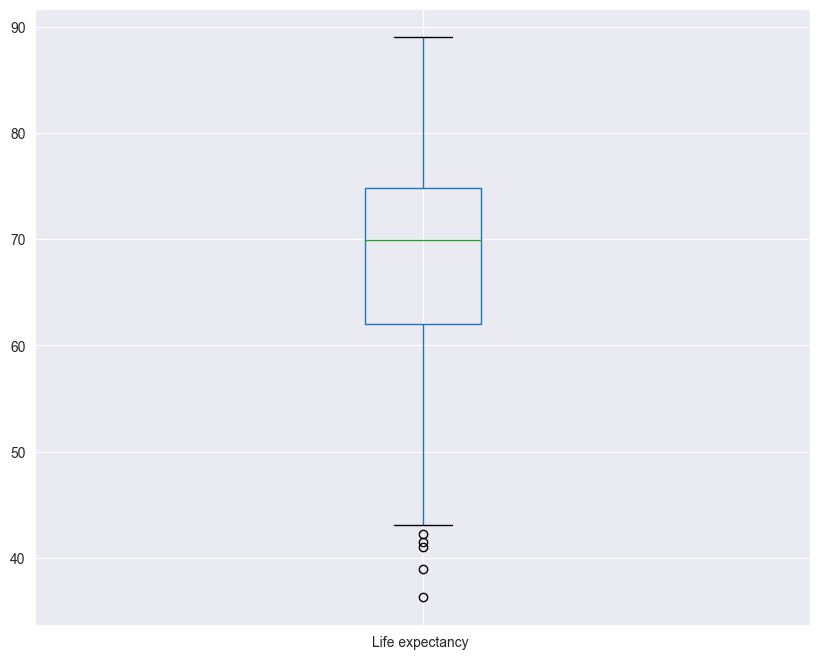

In [49]:
plt.figure(figsize=(10, 8))
data.boxplot('Life expectancy ')
plt.show()

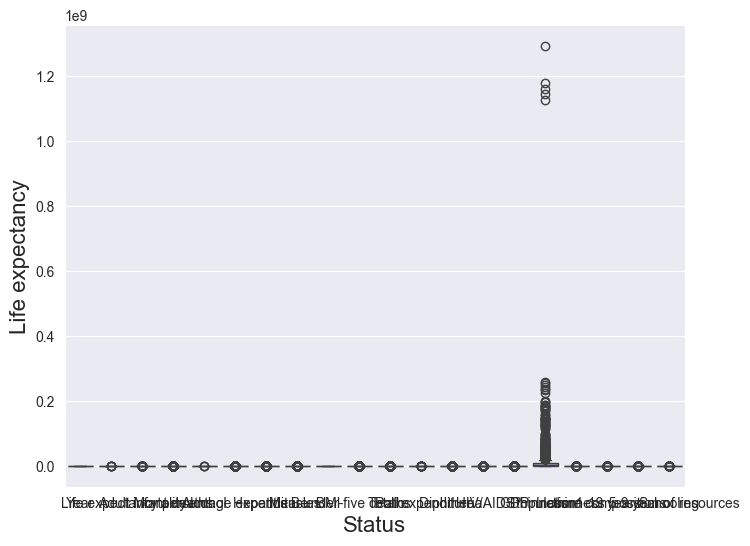

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.xlabel('Status', fontsize = 16)
plt.ylabel('Life expectancy', fontsize = 16)
plt.show()

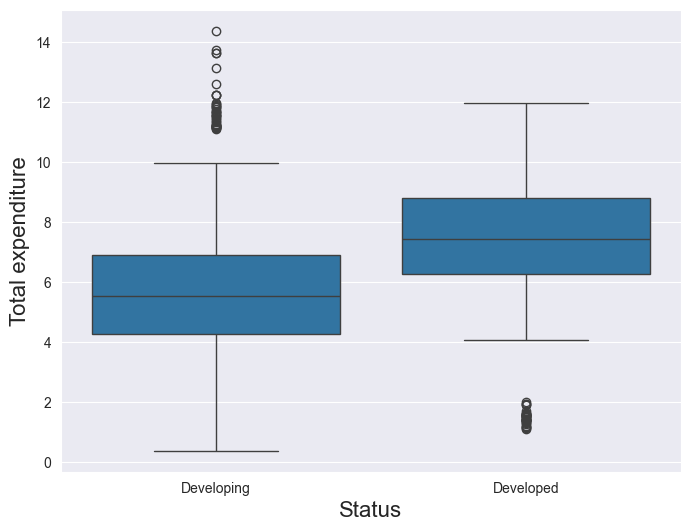

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Status'], y=data['Total expenditure'])
plt.xlabel('Status', fontsize = 16)
plt.ylabel('Total expenditure', fontsize = 16)
plt.show()

In [52]:
data_corr = data[['Life expectancy ', 
                  'Adult Mortality',
                  'Total expenditure', 
                  'Diphtheria ', 
                  'GDP',
                  'Population']].corr()
data_corr

,Life expectancy,Adult Mortality,Total expenditure,Diphtheria,GDP,Population
Life expectancy,1.000000,-0.662604,0.203689,0.449975,0.445425,-0.011420
Adult Mortality,-0.662604,1.000000,-0.097938,-0.212157,-0.259500,-0.021050
Total expenditure,0.203689,-0.097938,1.000000,0.183238,0.212498,-0.079752
Diphtheria,0.449975,-0.212157,0.183238,1.000000,0.190957,-0.024167
GDP,0.445425,-0.259500,0.212498,0.190957,1.000000,-0.016800
Population,-0.011420,-0.021050,-0.079752,-0.024167,-0.016800,1.000000


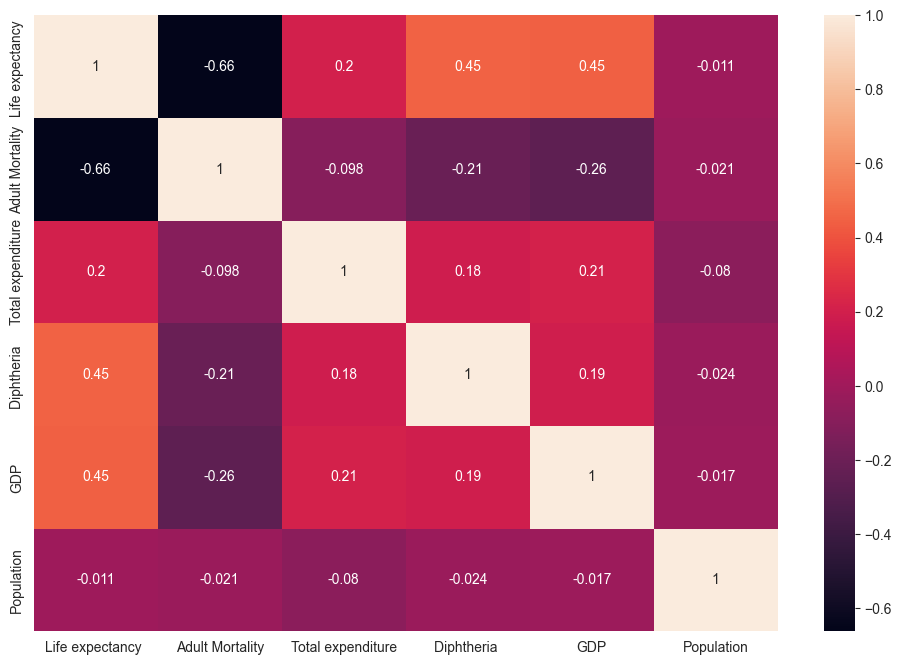

In [53]:
fix, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data_corr, annot=True)
plt.show()

In [54]:
features = data.drop('Life expectancy ', axis=1)
target = data['Life expectancy ']

In [55]:
features.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [56]:
target.sample(5)

849     52.7
2688    73.5
63      45.3
2135    75.0
2232    62.6
Name: Life expectancy , dtype: float64

In [57]:
features.drop('Country', axis=1, inplace=True)
features.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [58]:
categorical_features = features['Status'].copy()
categorical_features.head()

0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object

In [59]:
categorical_features = pd.get_dummies(categorical_features, dtype=float)
categorical_features.head()

,Developed,Developing
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [60]:
categorical_features['Developed'] = categorical_features['Developed'].astype(int)
categorical_features['Developing'] = categorical_features['Developing'].astype(int)
categorical_features.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [61]:
numeric_features = features.drop(['Status'], axis=1)
numeric_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [62]:
numeric_features.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2.128000e+03,2128.000000,2128.000000,2128.000000,2128.000000
mean,2007.500000,174.300282,35.902726,4.436893,640.072009,77.272061,2657.467105,36.691964,49.817199,80.572006,5.888411,80.699919,2.173637,5408.637801,1.340066e+07,5.107895,5.177538,0.607481,11.691823
std,4.610856,129.759274,136.224732,3.962858,1710.798798,25.260036,11912.236064,19.843731,185.152708,24.170053,2.256161,24.174256,5.827273,11374.230200,6.315714e+07,4.711951,4.805378,0.203404,3.203263
min,2000.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.750000,76.000000,1.000000,0.827500,19.883256,68.000000,0.000000,18.400000,1.000000,75.000000,4.367500,76.000000,0.100000,395.911290,1.989615e+05,1.600000,1.600000,0.476750,9.800000
50%,2007.500000,152.000000,4.000000,3.735000,83.677991,87.000000,20.000000,38.850000,4.000000,91.000000,5.800000,91.000000,0.100000,1351.177885,1.433672e+06,3.400000,3.400000,0.649500,11.900000
75%,2011.250000,241.250000,24.000000,7.162500,431.365149,95.000000,459.250000,55.200000,34.250000,96.000000,7.333000,96.000000,1.300000,4494.285047,7.785482e+06,7.525000,7.600000,0.747000,13.800000
max,2015.000000,723.000000,1800.000000,17.870000,18961.348600,99.000000,212183.000000,77.600000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.937000,20.700000


In [63]:
standardScaler = StandardScaler()
numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features), 
                                columns=numeric_features.columns, 
                                index=numeric_features.index)
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,0.000000e+00,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,-5.342427e-17,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,0.000000e+00,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,1.402387e-16,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,1.335607e-17,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,3.005115e-17,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,0.000000e+00,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,4.674623e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.669508e-17,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,8.347542e-17,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [64]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1, sort=False)
processed_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.626978,0.683732,0.191620,-1.117358,-0.332550,-0.485943,-0.126242,-0.886733,0.179261,-3.086031,...,-0.649601,-0.355934,-0.424250,0.322064,2.566866,2.523280,-0.631802,-0.497055,0,1
1,1.410048,0.745399,0.206305,-1.117358,-0.331238,-0.604736,-0.181828,-0.911936,0.195467,-0.934103,...,-0.773729,-0.355934,-0.421749,-0.207042,2.630549,2.564910,-0.646555,-0.528280,0,1
2,1.193118,0.722274,0.220990,-1.117358,-0.331416,-0.525541,-0.187034,-0.937139,0.211674,-0.768570,...,-0.690977,-0.355934,-0.420074,0.290313,2.673004,2.606539,-0.676060,-0.559506,0,1
3,0.976187,0.753107,0.243018,-1.117358,-0.328513,-0.406748,0.010876,-0.962342,0.233283,-0.561654,...,-0.566848,-0.355934,-0.416713,-0.153680,2.715459,2.668984,-0.710482,-0.590731,0,1
4,0.759257,0.776233,0.257703,-1.117358,-0.370075,-0.367151,0.029853,-0.982504,0.254892,-0.520270,...,-0.525472,-0.355934,-0.470041,-0.165057,2.779142,2.710614,-0.754739,-0.684408,0,1


In [65]:
processed_features.shape

(2128, 21)

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(processed_features, target, test_size = 0.2, random_state = 1)

In [67]:
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((1702, 21), (426, 21), (1702,), (426,))

In [68]:
def build_single_layer_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(32, input_shape = (x_train.shape[1], ), activation='sigmoid'))
    model.add(layers.Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
    model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])
    return model

In [69]:
model = build_single_layer_model()

C:\Users\haral\source\Repos\Getting-Started-with-Tensorflow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
num_epochs = 100
training_history = model.fit(x_train, y_train, epochs = num_epochs, validation_split = 0.2, verbose = True)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4416.9180 - mae: 65.7074 - mse: 4416.9180 - val_loss: 3530.5176 - val_mae: 58.8137 - val_mse: 3530.5176
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3221.7458 - mae: 56.0651 - mse: 3221.7458 - val_loss: 2214.5010 - val_mae: 46.2083 - val_mse: 2214.5010
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1875.2622 - mae: 42.2500 - mse: 1875.2622 - val_loss: 1106.4900 - val_mae: 32.1267 - val_mse: 1106.4900
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 935.4939 - mae: 29.2086 - mse: 935.4939 - val_loss: 475.7812 - val_mae: 20.2747 - val_mse: 475.7812
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 378.1998 - mae: 17.7117 - mse: 378.1998 - val_loss: 198.5046 - val_mae: 12.3840 - val_mse: 198.5046
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 163.3338 - mae: 11.0334 - mse: 163.3338 - val_loss: 92.9702 - val_mae: 8.0998 - val_mse: 92.9702
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━

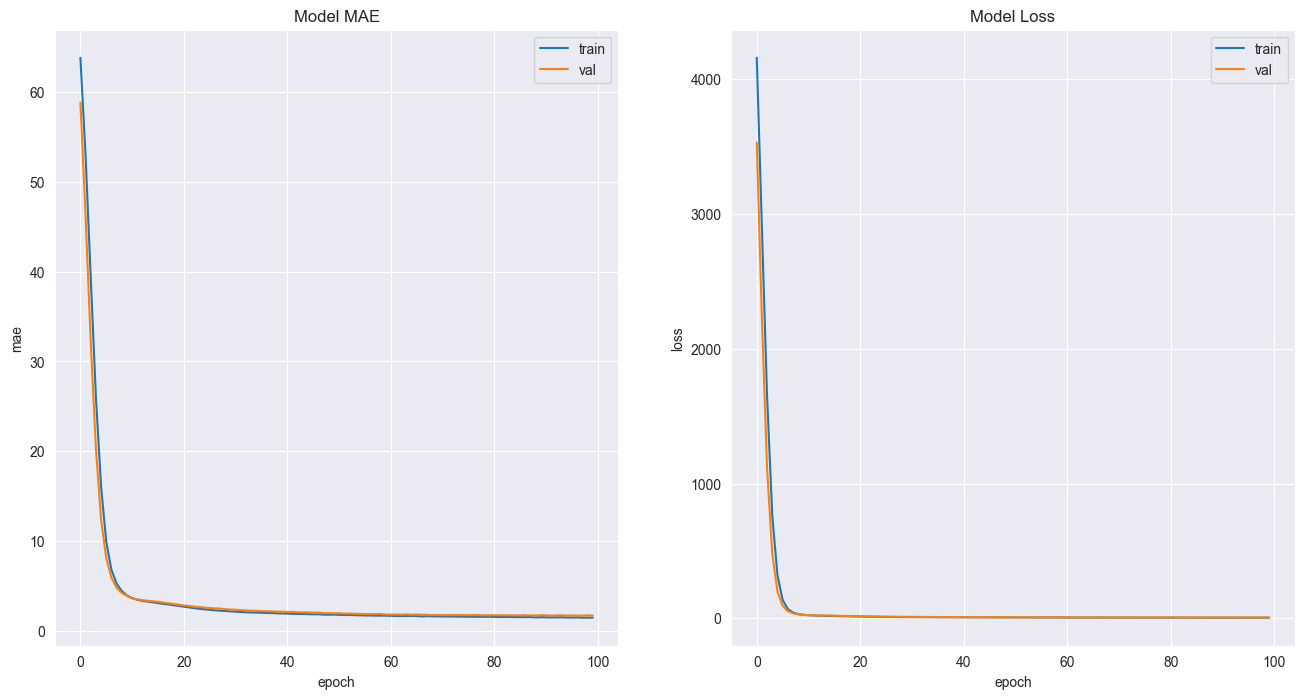

In [71]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

plt.plot(training_history.history['mae'])
plt.plot(training_history.history['val_mae'])

plt.title('Model MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)

plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [72]:
model.evaluate(x_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0204 - mae: 1.7737 - mse: 6.0204 


[6.018460273742676, 1.7404608726501465, 6.018460273742676]

In [73]:
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


0.933326608304883

In [74]:
pred_results = pd.DataFrame({
    'y_test': y_test.values.flatten(), 
    'y_pred': y_pred.flatten()
}, index = range(len(y_pred)))
pred_results.sample(10)

,y_test,y_pred
371,79.6,81.162140
338,69.6,70.437294
125,53.2,51.456421
297,71.1,74.348564
250,67.3,68.159355
416,61.1,57.527538
62,67.2,68.863808
53,51.4,48.217327
106,48.8,46.367664
220,71.4,73.417740


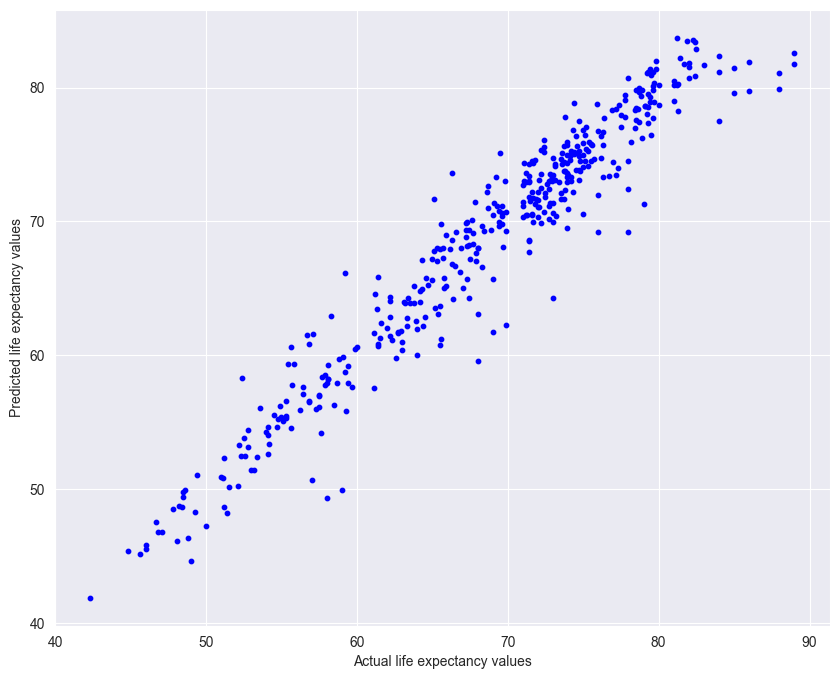

In [75]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, s=10, c='blue')
plt.xlabel('Actual life expectancy values')
plt.ylabel('Predicted life expectancy values')
plt.show()

In [76]:
def build_multiple_layer_model():
    model = keras.Sequential([
        layers.Dense(32, input_shape = (x_train.shape[1], ), activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1),
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
    
    model.compile(loss = 'mse', metrics = ['mae', 'mse'], optimizer = optimizer)
    
    return model

C:\Users\haral\source\Repos\Getting-Started-with-Tensorflow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


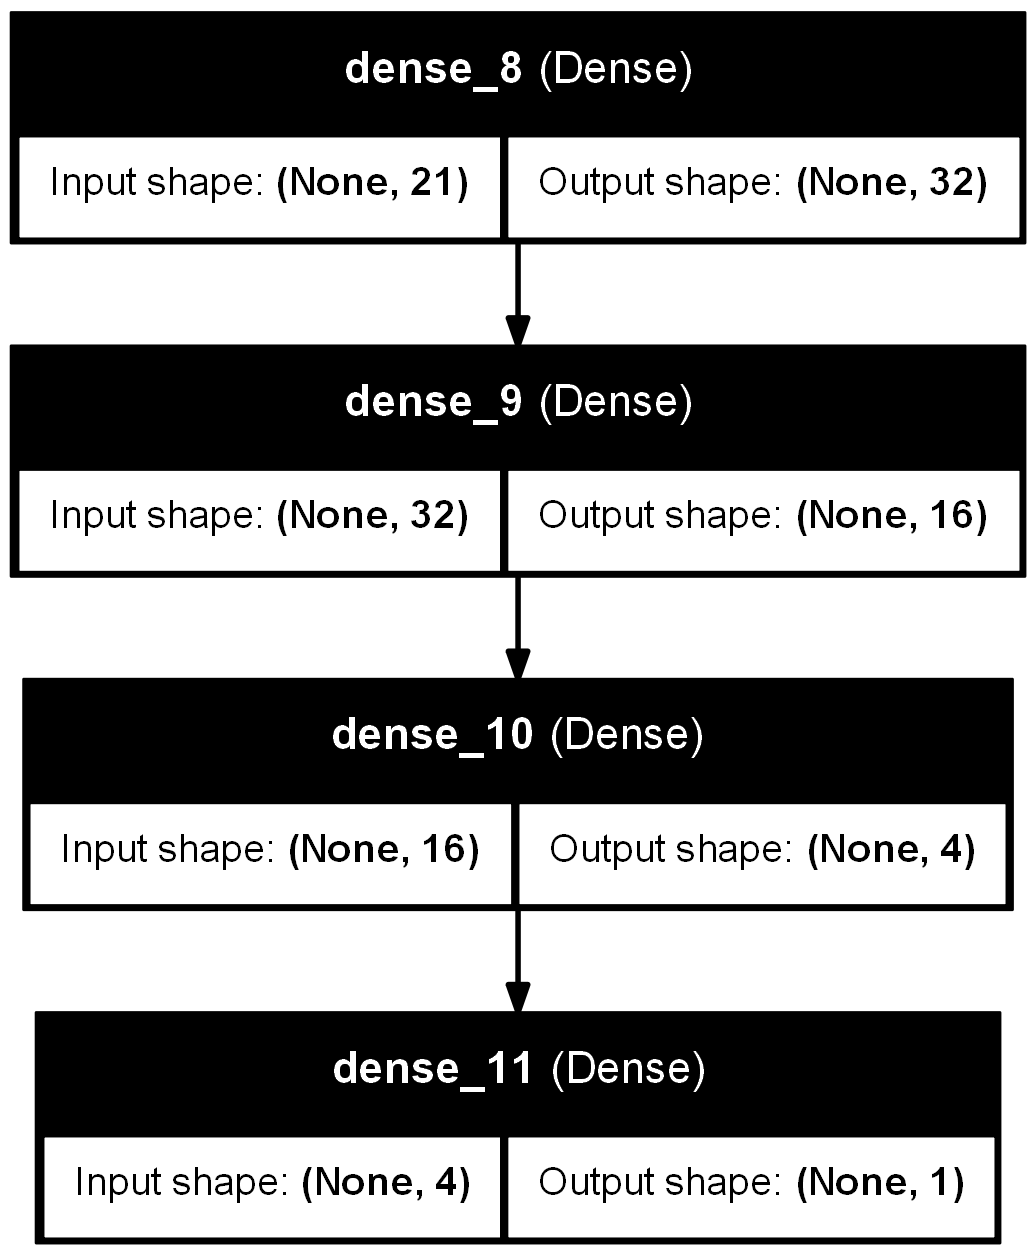

In [77]:
model = build_multiple_layer_model()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [78]:
!del seq_logs

^C


In [79]:
log_dir = os.path.join("seq_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

In [80]:
training_history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 500, batch_size = 100, callbacks = [tensorboard_callback])

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4671.5576 - mae: 67.6104 - mse: 4671.5581 - val_loss: 4628.9712 - val_mae: 67.3442 - val_mse: 4628.9712
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4590.7231 - mae: 67.0627 - mse: 4590.7231 - val_loss: 4539.5200 - val_mae: 66.6863 - val_mse: 4539.5195
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4451.5752 - mae: 66.0333 - mse: 4451.5752 - val_loss: 4417.3057 - val_mae: 65.7730 - val_mse: 4417.3057
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4369.6895 - mae: 65.3921 - mse: 4369.6895 - val_loss: 4243.6035 - val_mae: 64.4535 - val_mse: 4243.6035
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4178.8496 - mae: 63.9689 - mse: 4178.8501 - val_loss: 4001.8262 - val_mae: 62.5663 - val_mse: 4001.8262
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3936.9304 - mae: 62.0294 - mse: 3936.9304 - val_loss: 3675.7537 - val_mae: 59.9266 - val_mse: 3675.7537
Epoch 7/500
14/1

In [81]:
%load_ext tensorboard

In [82]:
%tensorboard --logdir seq_logs --port 6050

In [83]:
model.evaluate(x_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7860 - mae: 1.8685 - mse: 6.7860 


[6.564509391784668, 1.8136839866638184, 6.564509391784668]

In [86]:
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
r2
r2

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.9272773944778128

In [87]:
def build_model_with_sgd():
    model = keras.Sequential([layers.Dense(32, input_shape = (x_train.shape[1], ), activation='relu'),
                              layers.Dense(16, activation='relu'),
                              layers.Dense(4, activation='relu'),
                              layers.Dense(1)])
    optimizer = keras.optimizers.SGD(learning_rate = 0.001)
    
    model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])
    
    return model

C:\Users\haral\source\Repos\Getting-Started-with-Tensorflow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


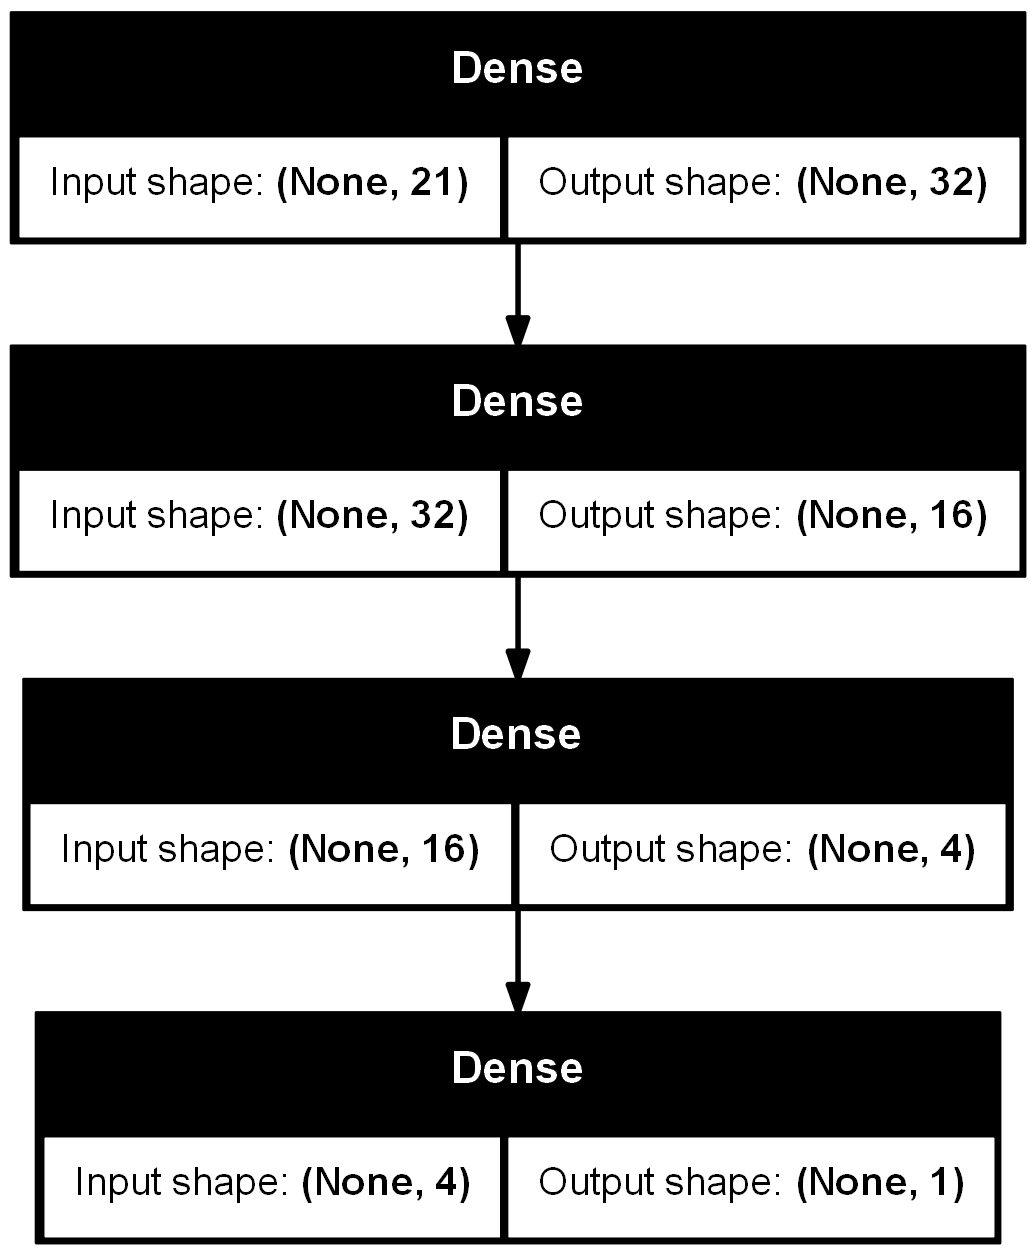

In [88]:
model_sgd = build_model_with_sgd()
tf.keras.utils.plot_model(model_sgd, show_shapes=True)

In [89]:
training_history = model_sgd.fit(x_train, y_train, validation_split = 0.2, epochs = 100, batch_size = 100)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4733.1807 - mae: 68.1520 - mse: 4733.1812 - val_loss: 2228.0645 - val_mae: 46.0547 - val_mse: 2228.0645
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1820.8966 - mae: 36.7652 - mse: 1820.8966 - val_loss: 4297.4824 - val_mae: 64.8479 - val_mse: 4297.4824
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3760.3733 - mae: 59.4321 - mse: 3760.3733 - val_loss: 348.3551 - val_mae: 16.9945 - val_mse: 348.3551
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 466.4747 - mae: 17.6057 - mse: 466.4747 - val_loss: 277.3231 - val_mae: 15.3066 - val_mse: 277.3231
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 154.1319 - mae: 10.9237 - mse: 154.1319 - val_loss: 102.6024 - val_mae: 8.8835 - val_mse: 102.6024
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 83.1047 - mae: 7.7318 - mse: 83.1047 - val_loss: 68.0565 - val_mae: 7.3207 - val_mse: 68.0565
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [90]:
model_sgd.evaluate(x_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4581 - mae: 2.1860 - mse: 7.4581 


[7.310090065002441, 2.13710618019104, 7.310090065002441]

In [92]:
y_pred = model_sgd.predict(x_test)
r2_score(y_test, y_pred)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.9190177314510501

In [93]:
def build_model_with_rms_prop():
    model = keras.Sequential([layers.Dense(16, input_shape = (x_train.shape[1], ), activation='elu'),
                              layers.Dense(8, activation='elu'),
                              layers.Dense(4, activation='elu'),
                              layers.Dense(1)])
    optimizer = keras.optimizers.RMSprop(learning_rate = 0.001)
    
    model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])
    
    return model

In [94]:
model_rmsprop = build_model_with_rms_prop()

C:\Users\haral\source\Repos\Getting-Started-with-Tensorflow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
training_history = model_rmsprop.fit(x_train, y_train, validation_split = 0.2, epochs = 100, batch_size = 100)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4749.4688 - mae: 68.1787 - mse: 4749.4688 - val_loss: 4674.1602 - val_mae: 67.6601 - val_mse: 4674.1602
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4676.3071 - mae: 67.6704 - mse: 4676.3071 - val_loss: 4604.3804 - val_mae: 67.1367 - val_mse: 4604.3804
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4575.3237 - mae: 66.9485 - mse: 4575.3237 - val_loss: 4535.1616 - val_mae: 66.6113 - val_mse: 4535.1611
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4524.9443 - mae: 66.5140 - mse: 4524.9443 - val_loss: 4463.4570 - val_mae: 66.0629 - val_mse: 4463.4575
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4456.3608 - mae: 65.9836 - mse: 4456.3613 - val_loss: 4388.3008 - val_mae: 65.4882 - val_mse: 4388.3008
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4336.5518 - mae: 65.0480 - mse: 4336.5518 - val_loss: 4308.7148 - val_mae: 64.8801 - val_mse: 4308.7148
Epoch 7/100
14/14 ━━━

In [96]:
model_rmsprop.evaluate(x_test, y_test)  

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.0304 - mae: 2.6258 - mse: 13.0304 


[12.838888168334961, 2.5942349433898926, 12.838888168334961]

In [97]:
y_pred = model_rmsprop.predict(x_test)
r2_score(y_test, y_pred)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.8577688985624522